In [10]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Varios
# ==============================================================================
from tqdm import tqdm

In [11]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/' \
      + 'master/datos/AfterSchool.csv'
datos = pd.read_csv(url)
datos = datos[['Treatment', 'Delinq']]
datos = datos.rename(columns={'Treatment': 'grupo', 'Delinq': 'valor'})
datos['grupo'] = np.where(datos['grupo'] == 0, 'control', 'tratamiento')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grupo   356 non-null    object 
 1   valor   356 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [12]:
datos

,grupo,valor
0,control,44.463082
1,control,76.813612
2,control,50.933188
3,control,44.463082
4,control,44.463082
...,...,...
351,tratamiento,70.343506
352,tratamiento,57.403294
353,tratamiento,44.463082
354,tratamiento,44.463082


In [13]:
df_csv = pd.read_csv('data.csv')#, encoding='latin-1', sep='|', header=None)

In [128]:
datos=df_csv[['trace_version','visualizaciones']]

In [129]:
datos

,trace_version,visualizaciones
0,teleworking_active,258
1,teleworking_inactive,20
2,teleworking_active,45
3,teleworking_active,407
4,teleworking_inactive,139
...,...,...
143397,teleworking_inactive,1
143398,teleworking_active,1
143399,teleworking_inactive,2
143400,teleworking_inactive,1


In [130]:
datos=datos[(datos['visualizaciones']<100) & (datos['visualizaciones']>=0)]

In [131]:
datos

,trace_version,visualizaciones
1,teleworking_inactive,20
2,teleworking_active,45
5,teleworking_inactive,31
6,teleworking_inactive,13
7,teleworking_active,57
...,...,...
143397,teleworking_inactive,1
143398,teleworking_active,1
143399,teleworking_inactive,2
143400,teleworking_inactive,1


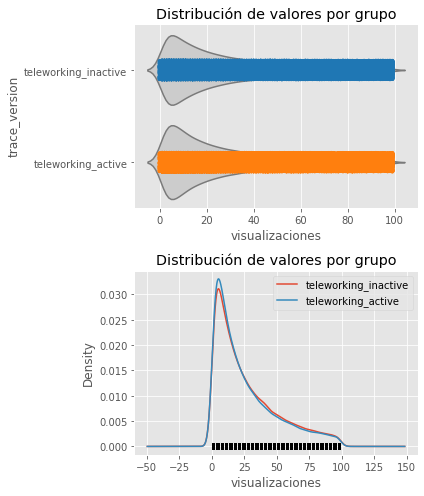

In [132]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 7))
sns.violinplot(
    x     = datos.visualizaciones,
    y     = datos.trace_version,
    color = ".8",
    ax    = axs[0]
)
sns.stripplot(
    x    = datos.visualizaciones,
    y    = datos.trace_version,
    data = datos,
    size = 4,
    jitter  = 0.1,
    palette = 'tab10',
    ax = axs[0]
)
axs[0].set_title('Distribución de valores por grupo')
axs[0].set_ylabel('trace_version')
axs[0].set_xlabel('visualizaciones');

for grupo in datos.trace_version.unique():
    datos_temp = datos[datos.trace_version == grupo]['visualizaciones']
    datos_temp.plot.kde(ax=axs[1], label=grupo)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

axs[1].set_title('Distribución de valores por grupo')
axs[1].set_xlabel('visualizaciones');
axs[1].legend()

fig.tight_layout();

In [133]:
# Estadísticos descriptivos por grupo
# ==============================================================================
datos.groupby(by='trace_version').describe()

visualizaciones                                        \
                               count       mean        std  min  25%   50%   
trace_version                                                                
teleworking_active           62246.0  25.930309  23.678838  0.0  7.0  18.0   
teleworking_inactive         62736.0  27.049700  24.084352  0.0  8.0  19.0   

                                  
                       75%   max  
trace_version                     
teleworking_active    38.0  99.0  
teleworking_inactive  40.0  99.0

In [134]:
def dif_mean(x1, x2):
    '''
    Función para calcular la diferencia de medias entre dos grupos.
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.
         
    x2 : numpy array
         valores de la muestra 2.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    
    estadistico = np.mean(x1) - np.mean(x2)
    return(estadistico)

In [135]:
dif_observada = dif_mean(
                    x1 = datos[datos.trace_version == 'teleworking_inactive']['visualizaciones'],
                    x2 = datos[datos.trace_version == 'teleworking_active']['visualizaciones']
                )
print(f"Diferencia observada: {dif_observada}")

Diferencia observada: 1.119391556687038


In [136]:
def permutaciones(x1, x2, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples permutaciones
    de dos muestras.
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra 1.
         
    x2 : numpy array
         valores de la muestra 2.
 
    fun_estadistico : function
        función que recibe como argumento las dos muestras y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número de permutaciones calculadas (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada permutación.
    '''
    
    n_x1 = len(x1)
    n_x2 = len(x2)
    pool_datos = np.hstack((x1, x2))
    
    resulados_permutaciones = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        np.random.shuffle(pool_datos)
        estadistico = fun_estadistico(pool_datos[:n_x1], pool_datos[n_x1:])
        resulados_permutaciones[i] = estadistico
        
    return resulados_permutaciones

In [137]:
dist_permut = permutaciones(
                x1 = datos[datos.trace_version == 'teleworking_inactive']['visualizaciones'],
                x2 = datos[datos.trace_version == 'teleworking_active']['visualizaciones'],
                fun_estadistico = dif_mean,
                n_iteraciones   = 9999
              )

100%|██████████| 9999/9999 [00:19<00:00, 509.02it/s]


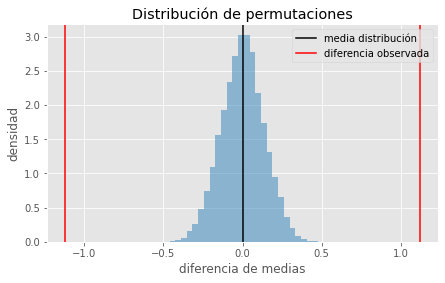

In [138]:
# Distribución de permutaciones
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_permut, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dist_permut.mean(), color='black', label='media distribución')
ax.axvline(x=dif_observada, color='red', label='diferencia observada')
ax.axvline(x=-dif_observada, color='red')

ax.set_title('Distribución de permutaciones')
ax.set_xlabel('diferencia de medias')
ax.set_ylabel('densidad')
ax.legend();

In [139]:
pd.Series(dist_permut).describe()

count    9999.000000
mean        0.001175
std         0.134622
min        -0.603443
25%        -0.089233
50%         0.002862
75%         0.090012
max         0.477145
dtype: float64

In [140]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(dist_permut) > np.abs(dif_observada)))/len(dist_permut)
p_value_correc = (sum(np.abs(dist_permut) > np.abs(dif_observada)) + 1)/len(dist_permut + 1)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.0
p-value con corrección: 0.00010001000100010001


# con boostraping

In [141]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping_2_grupos(x1, x2, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular la diferencia de un estadístico entre dos grupos en
    múltiples muestras generadas mediante muestreo repetido con reposición
    (bootstrapping).
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra del grupo 1.
         
    x2 : numpy array
         valores de la muestra del grupo 2.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        diferencia entre ambos grupos en cada muestra de bootstrapping.
    '''
    
    n1 = len(x1)
    n2 = len(x2)
    pool = np.hstack((x1, x2))
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        # Se crea una nueva muestra
        resample = np.random.choice(pool, size=n1+n2, replace=True)
        # Se reparten las observaciones en dos grupos y se calcula el estadístico
        estadistico_1 = fun_estadistico(resample[:n1])
        estadistico_2 = fun_estadistico(resample[n1:])
        # Diferencia entre estadísticos
        dist_boot[i]  = estadistico_1 - estadistico_2
        
    return dist_boot

In [142]:
dist_boot = bootstraping_2_grupos(
                x1 = datos[datos.trace_version == 'teleworking_inactive']['visualizaciones'],
                x2 = datos[datos.trace_version == 'teleworking_active']['visualizaciones'],
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:09<00:00, 1084.58it/s]


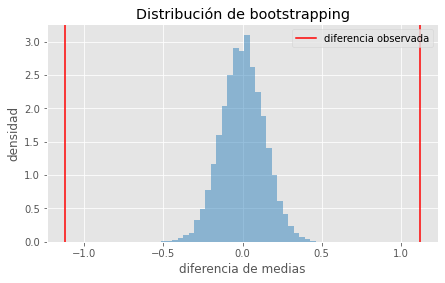

In [143]:
# Distribución de bootstrapping
# ==============================================================================
dif_observada = datos.visualizaciones[datos.trace_version == 'teleworking_inactive'].mean() \
                - datos.visualizaciones[datos.trace_version == 'teleworking_active'].mean()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dif_observada, color='red', label='diferencia observada')
ax.axvline(x=-dif_observada, color='red')

ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('diferencia de medias')
ax.set_ylabel('densidad')
ax.legend();

In [144]:
pd.Series(dist_boot).describe()


count    9999.000000
mean        0.001846
std         0.133805
min        -0.511241
25%        -0.087641
50%         0.002333
75%         0.091007
max         0.530390
dtype: float64

In [145]:
# P-value empírico con y sin corrección
# ==============================================================================
p_value = (sum(np.abs(dist_boot) > np.abs(dif_observada)))/len(dist_boot)
p_value_correc = (sum(np.abs(dist_boot) > np.abs(dif_observada)) + 1)/len(dist_boot + 1)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.0
p-value con corrección: 0.00010001000100010001


# 2

In [146]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping_2_grupos(x1, x2, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular la diferencia de un estadístico entre dos grupos en
    múltiples muestras generadas mediante muestreo repetido con reposición
    (bootstrapping) de forma separada para cada grupo.
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra del grupo 1.
         
    x2 : numpy array
         valores de la muestra del grupo 2.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        diferencia entre ambos grupos en cada muestra de bootstrapping.
    '''
    
    n1 = len(x1)
    n2 = len(x2)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        # Se crea una nueva muestra de cada grupo
        resample_1 = np.random.choice(x1, size=n1, replace=True)
        resample_2 = np.random.choice(x2, size=n2, replace=True)
        # Se calcula el estadístico para cada grupo
        estadistico_1 = fun_estadistico(resample_1)
        estadistico_2 = fun_estadistico(resample_2)
        # Diferencia entre estadísticos
        dist_boot[i]  = estadistico_1 - estadistico_2
        
    return dist_boot

In [150]:
dist_boot = bootstraping_2_grupos(
                x2 = datos[datos.trace_version == 'teleworking_inactive']['visualizaciones'],
                x1 = datos[datos.trace_version == 'teleworking_active']['visualizaciones'],
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:09<00:00, 1059.84it/s]


In [151]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[-1.3877308  -0.85564205]


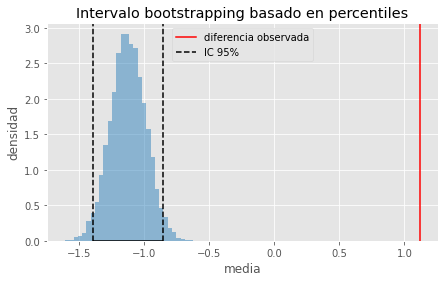

In [152]:
# Gráfico intervalo de confianza del 95%
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dif_observada, color='red', label='diferencia observada')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo bootstrapping basado en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();